## 16 - Making a Basic Skew-T

Watch video: [YouTube](https://www.youtube.com/watch?v=oog6_b-844Q)

The **Skew-T Log-P diagram**, commonly referred to as the **Skew-T plot**, is a graphical tool utilized in meteorology to represent the temperature and dewpoint profiles for a vertical segment of the atmosphere. It serves as a crucial instrument in weather forecasting and facilitates the analysis of air parcel ascent, particularly in scenarios such as thunderstorm and tornado formation.

In [3]:
import datetime
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir
import metpy.plots as mpplots
from metpy.units import pandas_dataframe_to_unit_arrays
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
date = datetime.datetime(2017, 9, 10)
df = WyomingUpperAir.request_data(date, 'BMX')

In [5]:
df = pandas_dataframe_to_unit_arrays(df)
p = df['pressure']
T = df['temperature']
Td = df['dewpoint']
u = df['u_wind']
v = df['v_wind']

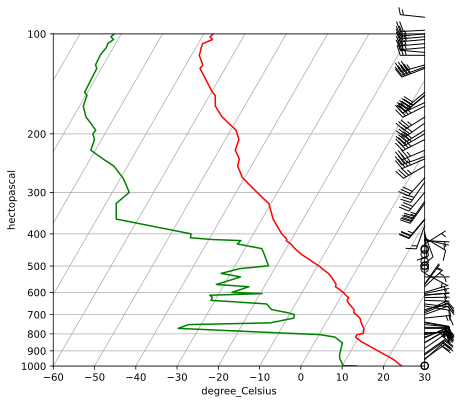

In [7]:
fig = plt.figure(1, figsize=(8, 6))
skew = mpplots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p, u, v)
plt.show()